# **DATA VISUALIZATION**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

#### LOAD DATASET

In [2]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

df = pd.read_csv(url)

In [3]:
def check_size(url):
    # Send a HEAD request (Metadata only, no file download)
    response = requests.head(url)
    
    # Look for the 'Content-Length' header
    size_in_bytes = response.headers.get('Content-Length')

    if size_in_bytes:
        # Convert string to integer
        size_in_bytes = int(size_in_bytes)

        # Convert to MB and GB for readability
        size_mb = size_in_bytes / (1024 * 1024)
        size_gb = size_in_bytes / (1024 * 1024 * 1024)

        print(f"File size: {size_in_bytes:,} bytes")
        print(f"File size: {size_mb:,} MB")
        print(f"File size: {size_gb:,} GB")

        # Decision making
        if size_mb > 1000:          # If file bigger than 1GB
            print("⚠️ Recommendation: DOWNLOAD to disk first (Too big for RAM)")
        else:            
            print("✅ Recommendation: Load directly with pd.read_csv() (Safe for RAM)")
    else:
        print("Could not determine file size (Server didn't send Content-Lengt header)")

check_size(url)

File size: 159,525,875 bytes
File size: 152.1357297897339 MB
File size: 0.148570048622787 GB
✅ Recommendation: Load directly with pd.read_csv() (Safe for RAM)


#### CREATE A SQLITE DATABASE AND INSERT THE DATA

since i haven't created a SQLite database yet, i'll create it first

In [4]:
import sqlite3

# Create a connection to SQLite database
conn = sqlite3.connect("my_analysis.db")

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

Verify the Data in the SQLite Database

In [5]:
# Reconnect to the SQLite database
conn = sqlite3.connect("my_analysis.db")

# Run simple query
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# display the results
df_check.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,None,...,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None,None
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,None,None
3,4,I am learning to code,18-24 years old,"Student, full-time",None,Apples,None,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,None,None
4,5,I am a developer by profession,18-24 years old,"Student, full-time",None,Apples,None,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,None,None


#### DEMO: RUNNING AN SQL QUERY

In [6]:
QUERY = """
SELECT COUNT (*) AS num_of_rows
FROM main
"""

pd.read_sql_query(QUERY, conn)

,num_of_rows
0,65437


#### DEMO: LISTING ALL TABLES

In [7]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master
WHERE type = 'table'
"""

pd.read_sql_query(QUERY, conn)

,Table_Name
0,main


#### DEMO: RUNNING A GROUP BY QUERY

In [8]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""

pd.read_sql_query(QUERY, conn)

,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


#### DEMO: DESCRIBING A TABLE

In [9]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master
WHERE name = '{}'
""".format(table_name)

pd.read_sql_query(QUERY, conn).iat[0,0]

'CREATE TABLE "main" (\n"ResponseId" INTEGER,\n  "MainBranch" TEXT,\n  "Age" TEXT,\n  "Employment" TEXT,\n  "RemoteWork" TEXT,\n  "Check" TEXT,\n  "CodingActivities" TEXT,\n  "EdLevel" TEXT,\n  "LearnCode" TEXT,\n  "LearnCodeOnline" TEXT,\n  "TechDoc" TEXT,\n  "YearsCode" TEXT,\n  "YearsCodePro" TEXT,\n  "DevType" TEXT,\n  "OrgSize" TEXT,\n  "PurchaseInfluence" TEXT,\n  "BuyNewTool" TEXT,\n  "BuildvsBuy" TEXT,\n  "TechEndorse" TEXT,\n  "Country" TEXT,\n  "Currency" TEXT,\n  "CompTotal" REAL,\n  "LanguageHaveWorkedWith" TEXT,\n  "LanguageWantToWorkWith" TEXT,\n  "LanguageAdmired" TEXT,\n  "DatabaseHaveWorkedWith" TEXT,\n  "DatabaseWantToWorkWith" TEXT,\n  "DatabaseAdmired" TEXT,\n  "PlatformHaveWorkedWith" TEXT,\n  "PlatformWantToWorkWith" TEXT,\n  "PlatformAdmired" TEXT,\n  "WebframeHaveWorkedWith" TEXT,\n  "WebframeWantToWorkWith" TEXT,\n  "WebframeAdmired" TEXT,\n  "EmbeddedHaveWorkedWith" TEXT,\n  "EmbeddedWantToWorkWith" TEXT,\n  "EmbeddedAdmired" TEXT,\n  "MiscTechHaveWorkedWith" 

---

#### VISUALIZING THE DISTRIBUTION DATA

HISTOGRAM

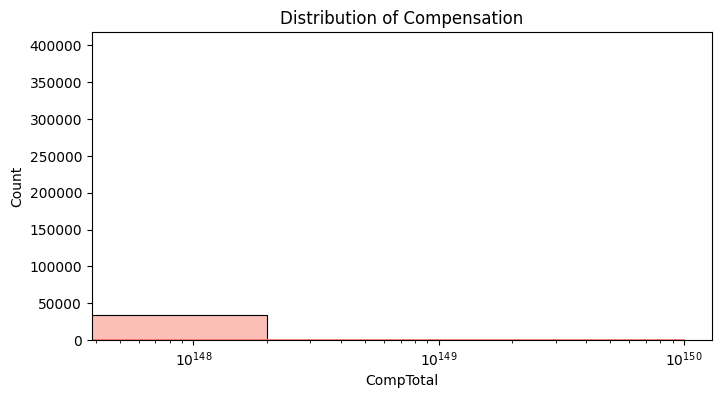

In [10]:
# Query the data
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL"
df_comp = pd.read_sql_query(query, conn)

# HISTOGRAM
plt.figure(figsize=(8,4))

sns.histplot(df_comp, x='CompTotal', bins=50, kde=True, color='salmon')
plt.title('Distribution of Compensation')
plt.xscale('log')
plt.show()

BOX PLOT

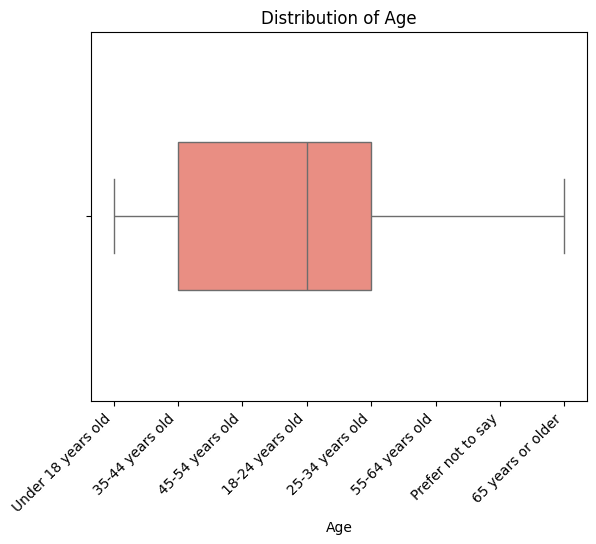

In [11]:
query = "SELECT Age FROM main WHERE Age IS NOT NULL"
df_age = pd.read_sql_query(query, conn)


# BOX PLOT
sns.boxplot(df_age, x='Age', color='salmon', width=0.4)

plt.title("Distribution of Age")
plt.xticks(rotation=45, ha='right')
plt.show()

Scatter and line plot

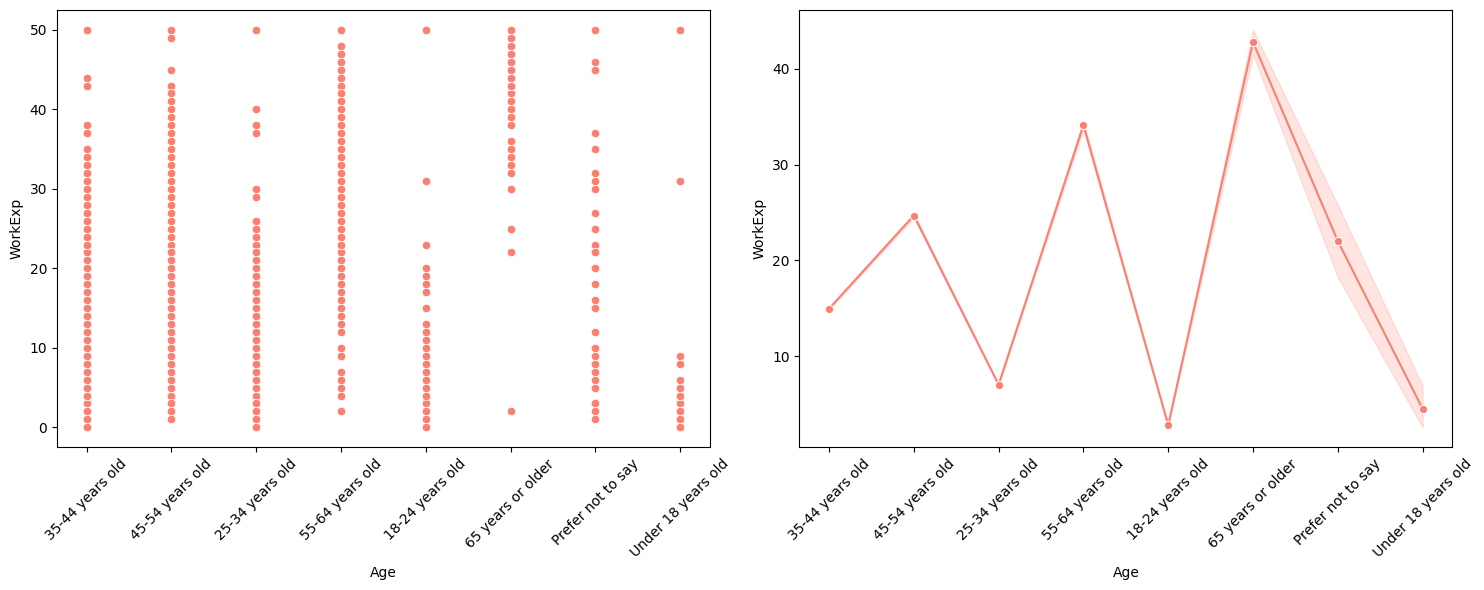

In [12]:
query = "SELECT Age, WorkExp FROM main WHERE Age IS NOT NULL AND WorkExp IS NOT NULL"
df_aw = pd.read_sql_query(query, conn)

# Scatter and Line Plot
fig, axes = plt.subplots(1, 2, figsize=(15,6))

# Scatter
sns.scatterplot(df_aw, x='Age', y='WorkExp', color='salmon', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)

# Line Plot
sns.lineplot(df_aw, x='Age', y='WorkExp', marker='o', ax=axes[1], color='salmon')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Bubble Plots

In [13]:
query = "SELECT TimeSearching, Frustration, Age FROM main"
bubble_df = pd.read_sql_query(query, conn).dropna()

In [14]:
# Replace with shorter values
time_map = {
    'Less than 15 minutes a day' : '<15',
    '15-30 minutes a day': '15-30', 
    '30-60 minutes a day': '30-60', 
    '60-120 minutes a day': '60-120' ,
    'Over 120 minutes a day': '>120'
}

bubble_df['TimeSearching'] = bubble_df['TimeSearching'].replace(time_map)

time_order = ['<15', '15-30', '30-60', '60-120', '>120']

bubble_df['TimeSearching'] = pd.Categorical(bubble_df['TimeSearching'], categories=time_order, ordered=True)

In [15]:
# Explode Frustration column
bubble_df['Clean_Frustration'] = bubble_df['Frustration'].str.split(';')
explode_df = bubble_df.explode('Clean_Frustration')

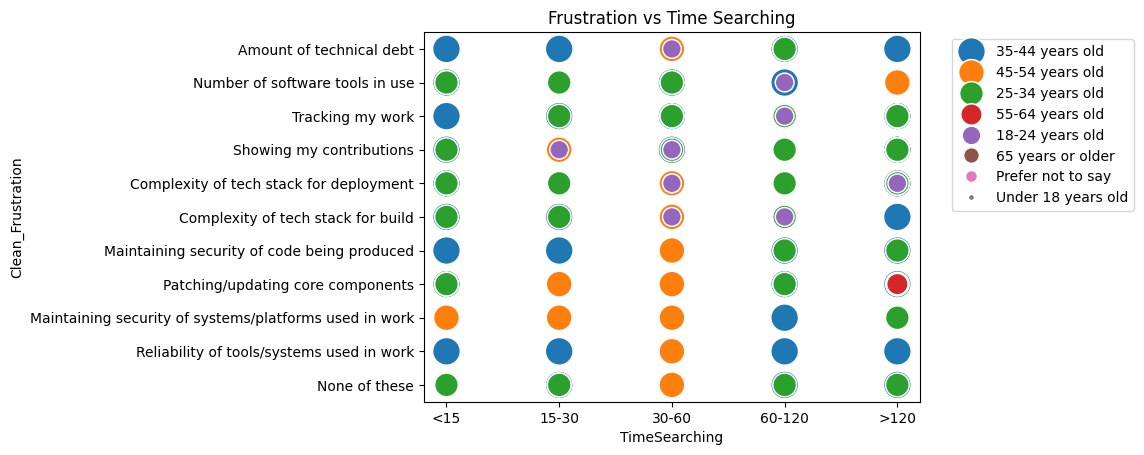

In [16]:
sns.scatterplot(explode_df, x='TimeSearching', y='Clean_Frustration', size='Age', sizes=(20,400), hue='Age')

plt.title("Frustration vs Time Searching")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()

---

#### VISUALIZING COMPOSITION OF DATA

Pie Charts

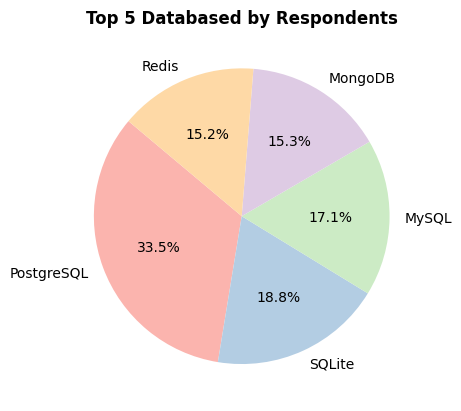

In [17]:
# Query data and save to df
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL"
db_df = pd.read_sql_query(query, conn)

# Split values and then explode for clarity
db_df['Clean_Database'] = db_df['DatabaseWantToWorkWith'].str.split(';')
database_df = db_df.explode('Clean_Database')

# Select top 5 database based on respondents
top5_db = database_df['Clean_Database'].value_counts().head()

# PIE CHART
plt.pie(top5_db, labels=top5_db.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Top 5 Databased by Respondents', fontweight='bold')

plt.show()

Stacked Charts

In [18]:
query = "SELECT TimeSearching, TimeAnswering, Age FROM main WHERE Age == '25-34 years old'"
tta_df = pd.read_sql_query(query, conn).dropna()

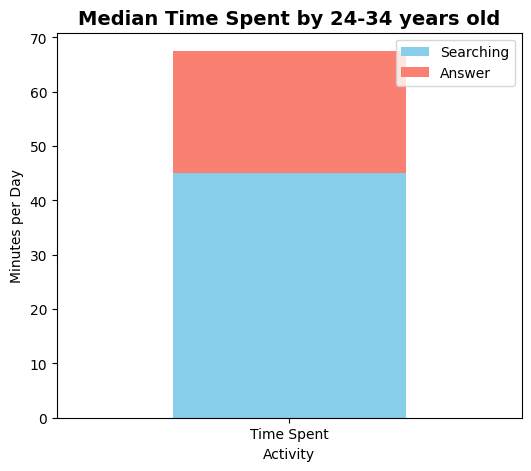

In [20]:
# Create Map that convert String -> Numeric
time_map = {
    'Less than 15 minutes a day': 10,  # Estimate
    '15-30 minutes a day': 22.5,
    '30-60 minutes a day': 45,
    '60-120 minutes a day': 90,
    'Over 120 minutes a day': 135      # Estimate
}

# Apply the map
tta_df['TimeSearching_Num'] = tta_df['TimeSearching'].map(time_map)
tta_df['TimeAnswering_Num'] = tta_df['TimeAnswering'].map(time_map)

# Calculate the Medians
median_search = tta_df['TimeSearching_Num'].median()
median_answer = tta_df['TimeAnswering_Num'].median()

plot_df = pd.DataFrame({
    'Activity': ['Time Spent'],
    'Searching': [median_search],
    'Answer': [median_answer]
})

plot_df.set_index('Activity').plot(
    kind='bar',
    stacked=True,
    color=['skyblue', 'salmon'],
    figsize=(6,5)
)

plt.title(f"Median Time Spent by 24-34 years old", fontsize=14, fontweight="bold")
plt.ylabel('Minutes per Day')
plt.xticks(rotation=0)
plt.show()

#### VISUALIZING COMPARISON OF DATA

Line Chart

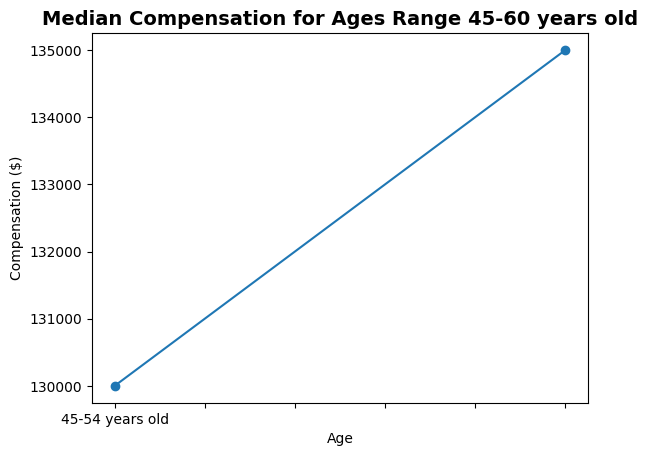

In [29]:
query = "SELECT CompTotal, Age FROM main WHERE Age == '45-54 years old' OR Age == '55-64 years old'"
comp_df = pd.read_sql_query(query, conn).dropna()

median_comp = comp_df.groupby('Age')['CompTotal'].median()

median_comp.plot(
    kind='line',
    marker='o'
)

plt.title(f"Median Compensation for Ages Range 45-60 years old", fontsize=14, fontweight="bold")
plt.ylabel('Compensation ($)')
plt.xticks(rotation=0)
plt.show()

Bar Chart

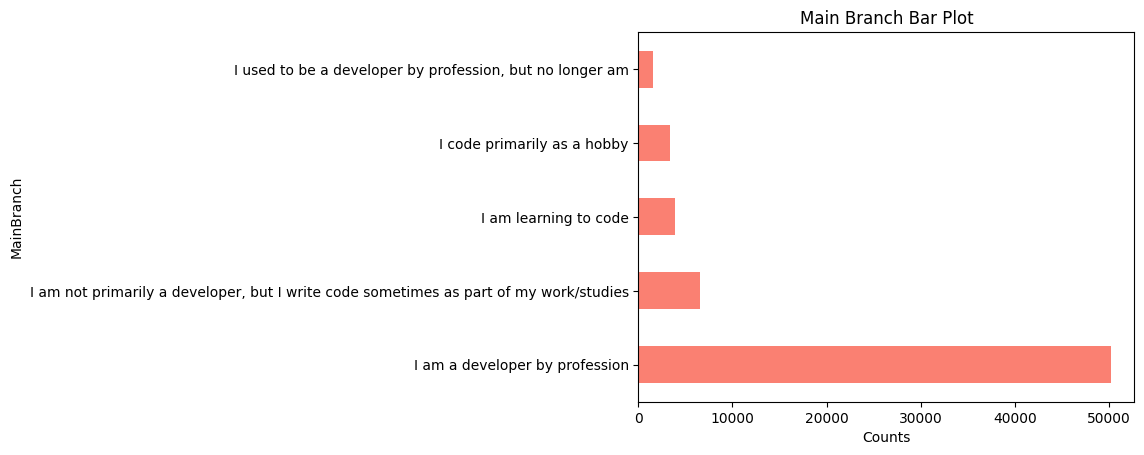

In [39]:
query = "SELECT MainBranch FROM main WHERE MainBranch IS NOT NULL"
mb_data = pd.read_sql_query(query, conn)

mb_count = mb_data['MainBranch'].value_counts()

mb_count.plot(
    kind='barh',
    color='salmon'
)

plt.title("Main Branch Bar Plot")
plt.xlabel("Counts")

plt.show()

In [40]:
# Close Database Connection
conn.close()

---

#### **SUMMARY**

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, TimeSearching and TimeAnswering.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.